# Preprocessing and visualization

### Importing necessary libraries

In [6]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
import lightgbm as lgb
from sklearn.metrics import auc, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from plotly.subplots import make_subplots
import plotly.graph_objects as graph_objects
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier as kNN
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression
import keras
from keras.models import Sequential
from keras.layers import Dense

from keras.wrappers.scikit_learn import KerasClassifier



In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
dataset = pd.read_csv("assets/healthcare-dataset-stroke-data.csv") 

In [4]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# filling missing values in the dataset
avg1 = dataset[dataset['stroke'] == 1]['bmi'].mean()
df2 = dataset[dataset['stroke'] == 1].fillna(avg1)
avg0 = dataset[dataset['stroke'] == 0]['bmi'].mean()
df1 = dataset[dataset['stroke'] == 0].fillna(avg0)
dataset = pd.concat([df1,df2], axis = 0)

In [9]:
df = dataset.copy(deep = True)

## Exploratory Discriminant Analysis

In [10]:

counts0 = Counter(df[df['stroke']==0]['work_type'])
counts1 = Counter(df[df['stroke']==1]['work_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Worktype','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Worktype",
    font=dict(size=18)
)

fig.show()

In [11]:
counts0 = Counter(df[df['stroke']==0]['gender'])
counts1 = Counter(df[df['stroke']==1]['gender'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Gender','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Gender",
    font=dict(size=18)
)

fig.show()

In [12]:
counts0 = Counter(df[df['stroke']==0]['Residence_type'])
counts1 = Counter(df[df['stroke']==1]['Residence_type'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Residence type','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Residence type",
    font=dict(size=18)
)

fig.show()

In [13]:
counts0 = Counter(df[df['stroke']==0]['hypertension'])
counts1 = Counter(df[df['stroke']==1]['hypertension'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs hypertension','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="hypertension",
    font=dict(size=18)
)

fig.show()

In [14]:
counts0 = Counter(df[df['stroke']==0]['ever_married'])
counts1 = Counter(df[df['stroke']==1]['ever_married'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs marriage status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="marriage status",
    font=dict(size=18)
)

fig.show()

In [15]:
counts0 = Counter(df[df['stroke']==0]['heart_disease'])
counts1 = Counter(df[df['stroke']==1]['heart_disease'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Heart Disease','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Heart disease",
    font=dict(size=18)
)

fig.show()

In [16]:
counts0 = Counter(df[df['stroke']==0]['smoking_status'])
counts1 = Counter(df[df['stroke']==1]['smoking_status'])
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts0.items())],
     labels=[item[0] for item in sorted(counts0.items())],
     domain=dict(x=[0, 0.5]),
     name="Stroke Negative",title='Stroke Negative'), 
     row=1, col=1)

fig.add_trace(graph_objects.Pie(
     values=[item[1] for item in sorted(counts1.items())],
     labels=[item[0] for item in sorted(counts1.items())],
     domain=dict(x=[0.5, 1.0]),
     name="Stroke Positive",title='Stroke Positive'),
    row=1, col=2)

fig.update_layout(
    title={'text':'Stroke vs Smoking Status','xanchor':'left','yanchor': 'top','y':0.9,'x':0.35},
    xaxis_title="X Axis Title",
    yaxis_title="Y Axis Title",
    legend_title="Smoking Status",
    font=dict(size=18)
)

fig.show()

In [17]:
glucose_bins = np.linspace(0,280,29)
bmi_bins = np.linspace(0,100,51)
age_bins = np.linspace(0,90,10)
df['binned_glucose'] = pd.cut(df['avg_glucose_level'], glucose_bins, labels=glucose_bins[:-1],right=False)
df['binned_bmi'] = pd.cut(df['bmi'], bmi_bins, labels=bmi_bins[:-1],right=False)
df['binned_age'] = pd.cut(df['age'], age_bins, labels=age_bins[:-1],right=False)
df['binned_glucose'] = df['binned_glucose'].astype('int')
df['binned_bmi'] = df['binned_bmi'].astype('int')
df['binned_age'] = df['binned_age'].astype('int')

Text(0, 0.5, 'Count')

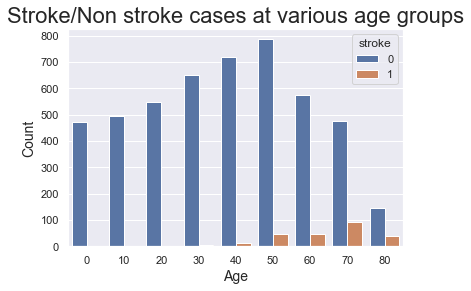

In [18]:
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_age',hue='stroke',data=df)
ax.set_title('Stroke/Non stroke cases at various age groups').set_fontsize(22)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

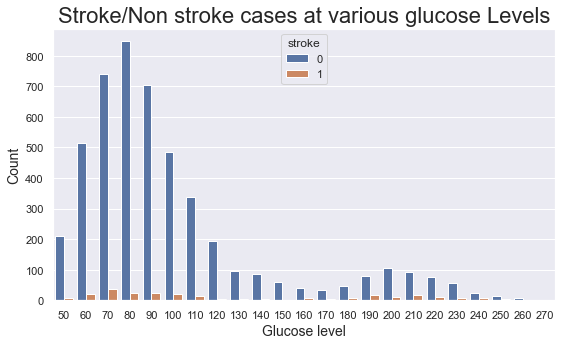

In [19]:
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_glucose',hue='stroke',data=df)
ax.set_title('Stroke/Non stroke cases at various glucose Levels').set_fontsize(22)
ax.set_xlabel('Glucose level',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

Text(0, 0.5, 'Count')

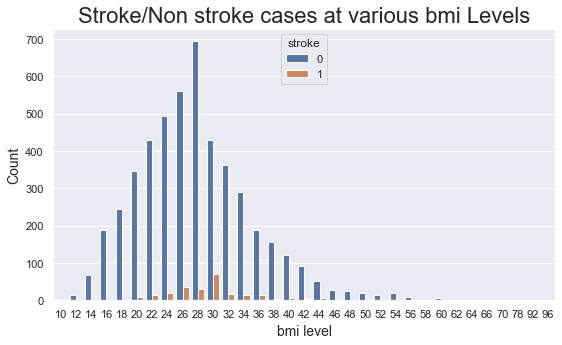

In [28]:
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.countplot(x='binned_bmi',hue='stroke',data = df)
ax.set_title('Stroke/Non stroke cases at various bmi Levels').set_fontsize(22)
ax.set_xlabel('bmi level',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

dict_items([(220, 10), (200, 12), (100, 20), (170, 4), (180, 7), (70, 36), (90, 24), (50, 8), (80, 25), (120, 4), (210, 16), (160, 6), (190, 16), (230, 7), (250, 3), (60, 19), (140, 3), (240, 6), (110, 15), (130, 5), (260, 1), (150, 1), (270, 1)])
dict_items([(90, 729), (80, 872), (110, 354), (60, 534), (160, 47), (210, 110), (70, 776), (240, 30), (200, 119), (50, 220), (120, 198), (190, 96), (100, 506), (140, 90), (130, 100), (220, 86), (230, 64), (180, 53), (250, 16), (170, 39), (150, 62), (260, 8), (270, 1)])
(23,)


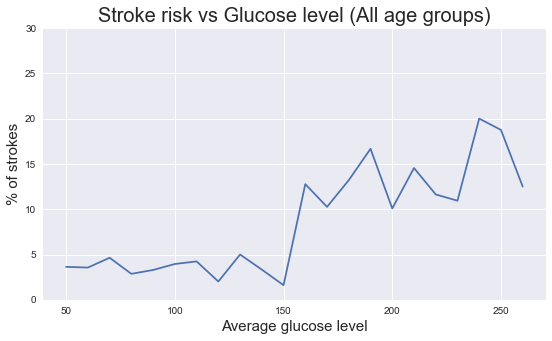

In [20]:
stroke_cases = Counter(df['binned_glucose'][df['stroke']==1])
total_cases = Counter(df['binned_glucose'])
print(stroke_cases.items())
print(total_cases.items())
print(np.array([item[1] for item in sorted(stroke_cases.items())]).shape)
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.ylim(0,30)
plt.title('Stroke risk vs Glucose level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Average glucose level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'b')

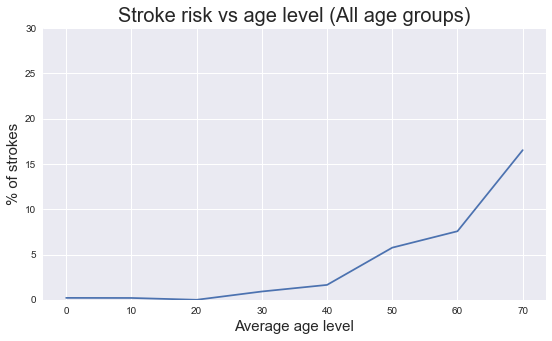

In [30]:
stroke_cases = Counter(df['binned_age'][df['stroke']==1])
total_cases = Counter(df['binned_age'])
stroke_cases[20] = 0
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.ylim(0,30)
plt.title('Stroke risk vs age level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('Average age level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'b')

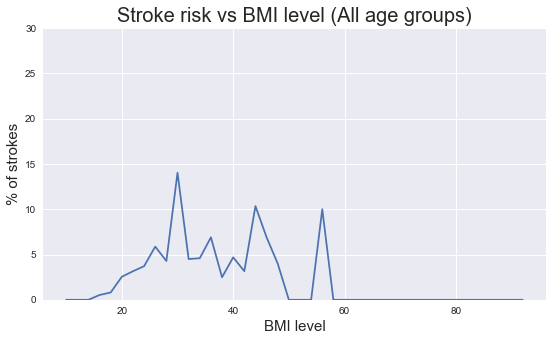

In [31]:
stroke_cases = Counter(df['binned_bmi'][df['stroke']==1])
total_cases = Counter(df['binned_bmi'])
for key in total_cases:
    if(key not in stroke_cases.keys()):
        stroke_cases[key] = 0
stroke_pct = 100*np.array([item[1] for item in sorted(stroke_cases.items())])/np.array([item[1] for item in sorted(total_cases.items())])
labels = [item[0] for item in sorted(total_cases.items())]
plt.style.use('seaborn')
plt.figure(figsize=(9,5))
plt.ylim(0,30)
plt.title('Stroke risk vs BMI level (All age groups)',fontsize=20)
plt.ylabel('% of strokes',fontsize=15)
plt.xlabel('BMI level',fontsize=15)
plt.plot(labels[:-1],stroke_pct[:-1],'b')

In [32]:
dataset.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
dataset.drop(['id'], axis = 1, inplace = True)

In [34]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 249 to 248
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [22]:
# normalizing continous feature columns
scaler = StandardScaler()
for feature in dataset.columns:
    if(feature == 'age' or feature == 'avg_glucose_level' or feature == 'bmi'):
        dataset[[feature]] = scaler.fit_transform(dataset[[feature]])
    else:
        continue
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,-1.779117,0,0,No,children,Rural,-0.243549,-1.416293,Unknown,0
250,Male,0.653388,1,0,Yes,Private,Urban,-0.401679,1.337478,never smoked,0
251,Female,-1.557980,0,0,No,Private,Urban,0.104735,-1.468251,Unknown,0
252,Female,1.184116,0,0,Yes,Private,Rural,-0.819532,0.908825,formerly smoked,0
253,Male,-1.292616,0,0,No,Never_worked,Rural,1.217610,-1.273408,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,0.609161,0,0,Yes,Private,Rural,-0.467935,1.012741,Unknown,1
245,Female,-1.292616,0,0,No,children,Rural,-1.064899,0.259351,Unknown,1
246,Female,1.405253,0,0,Yes,Self-employed,Rural,-0.603980,0.051519,formerly smoked,1
247,Male,1.228344,1,0,Yes,Self-employed,Rural,-0.405213,0.203664,Unknown,1


In [23]:
# Label Encoding of Categorical features
for feature in dataset.columns:
    if(dataset[feature].dtype == 'object'):
        dataset[feature] = LabelEncoder().fit_transform(dataset[feature])

In [38]:
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,-1.779117,0,0,0,4,0,-0.243549,-1.416293,0,0
250,1,0.653388,1,0,1,2,1,-0.401679,1.337478,2,0
251,0,-1.557980,0,0,0,2,1,0.104735,-1.468251,0,0
252,0,1.184116,0,0,1,2,0,-0.819532,0.908825,1,0
253,1,-1.292616,0,0,0,1,0,1.217610,-1.273408,0,0
...,...,...,...,...,...,...,...,...,...,...,...
244,1,0.609161,0,0,1,2,0,-0.467935,1.012741,0,1
245,0,-1.292616,0,0,0,4,0,-1.064899,0.259351,0,1
246,0,1.405253,0,0,1,3,0,-0.603980,0.051519,1,1
247,1,1.228344,1,0,1,3,0,-0.405213,0.203664,0,1


In [24]:
# Splitting the dataset into train and test
dataset_train, dataset_test = train_test_split(dataset, random_state = 42, test_size = 0.2, stratify = dataset.stroke)

In [25]:
# splitting the train and test data into inputs(features) and outputs(targets)
X_train = dataset_train.iloc[:,:10]
y_train = dataset_train.iloc[:,-1]
X_test = dataset_test.iloc[:,:10]
y_test = dataset_test.iloc[:,-1]

In [26]:
# Sampling of the dataset since, number of positive samples are very low in the original dataset
counter = Counter(y_train)
print('Before', counter)
oversampler = RandomOverSampler(sampling_strategy='minority')
x_sm, y_sm = oversampler.fit_resample(X_train, y_train)
counter = Counter(y_sm)
print("After", counter)

Before Counter({0: 3889, 1: 199})
After Counter({0: 3889, 1: 3889})


#Models

In [27]:
# function for specificity and sensitivity
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [28]:
models = []
models_accuracy = []
models_sensitivity = []
models_specificity = []
models_f1_score = []
classifiers = []

In [29]:
# custom loss function to prioritize both sensitivity and specificity  
def custom_loss_function1(y_test,pred):
    sens = calc_sens_spec(y_test,pred)[0]
    spec = calc_sens_spec(y_test,pred)[1]
    return 2*sens*spec/(sens + spec)

In [30]:
def append_scores(model,y_test,y_pred):
    models.append(model)
    models_accuracy.append(accuracy_score(y_test, y_pred))
    models_sensitivity.append(calc_sens_spec(y_test,y_pred)[0])
    models_specificity.append(calc_sens_spec(y_test,y_pred)[1])
    models_f1_score.append(f1_score(y_test, y_pred))
    return

def show_analysis(model,y_test,pred,y_prob):
    print("Classification report for {}: \n{}".format(model,classification_report(y_test,pred)))
    print("Confusion matrix for {}: \n{}".format(model,confusion_matrix(y_test,pred)))
    print("Accuracy score for {}: {:.2f}".format(model,accuracy_score(y_test,pred)))
    # calculate sensitivity, specificity, and auc
    sens_dtree,spec_dtree = calc_sens_spec(y_test,pred)
    fpr, tpr, _ = roc_curve(y_test,  y_prob[:,1])
    auc_dtree = roc_auc_score(y_test, y_prob[:,1])
    print("Sensitivity score for {}: {:.2f}".format(model,sens_dtree))
    print("Specitivity score for {}: {:.2f}".format(model,spec_dtree))
    print("AUC score for {}: {:.2f}".format(model,auc_dtree))
    fig, ax = plt.subplots()
    ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
    ax.plot([0, 1], [0, 1], color='green', linestyle='--')
    ax.set_xlim([-0.05, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic {}'.format(model))
    ax.legend(loc="lower right")
    plt.show()
    return

##DT

Classification report for DT: 
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.22      0.16      0.18        50

    accuracy                           0.93      1022
   macro avg       0.59      0.57      0.57      1022
weighted avg       0.92      0.93      0.93      1022

Confusion matrix for DT: 
[[943  29]
 [ 42   8]]
Accuracy score for DT: 0.93
Sensitivity score for DT: 0.16
Specitivity score for DT: 0.97
AUC score for DT: 0.57


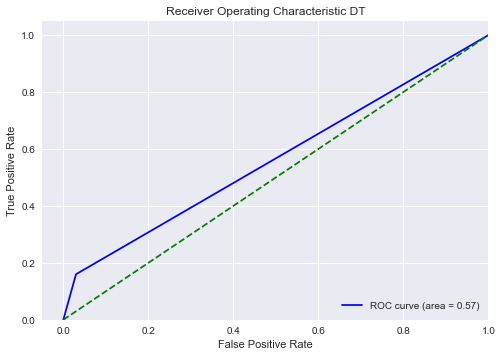

In [39]:
# Training Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_sm, y_sm)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

append_scores('DT',y_test,y_pred)
show_analysis('DT',y_test,y_pred,y_prob)

In [40]:
# # Grid Search for Decision tree Classifier
params = {
        'criterion': ['gini','entropy'],
        'min_samples_leaf': range(1,3),
        'max_depth': range(2,6)
        }
scorer = make_scorer(custom_loss_function1,greater_is_better=True)
clf = GridSearchCV(DecisionTreeClassifier(), params, scoring = scorer)
clf.fit(x_sm,y_sm)
# clf.cv_results_
print(clf.best_score_)
print(clf.best_params_)

0.8003474710589671
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}


Classification report for Grid search DT: 
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       972
           1       0.11      0.74      0.19        50

    accuracy                           0.69      1022
   macro avg       0.54      0.71      0.50      1022
weighted avg       0.94      0.69      0.78      1022

Confusion matrix for Grid search DT: 
[[667 305]
 [ 13  37]]
Accuracy score for Grid search DT: 0.69
Sensitivity score for Grid search DT: 0.74
Specitivity score for Grid search DT: 0.69
AUC score for Grid search DT: 0.80


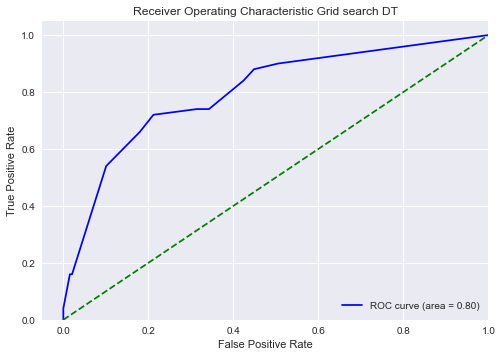

In [41]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_leaf = 1)
clf.fit(x_sm,y_sm)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)
show_analysis('Grid search DT',y_test,y_pred,y_prob)
append_scores('Grid search DT', y_test,y_pred)

##Naives bayes

In [61]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_sm, y_sm) 

GaussianNB()

Classification report for Grid search SVC RBF: 
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       972
           1       0.13      0.76      0.22        50

    accuracy                           0.74      1022
   macro avg       0.56      0.75      0.53      1022
weighted avg       0.94      0.74      0.81      1022

Confusion matrix for Grid search SVC RBF: 
[[714 258]
 [ 12  38]]
Accuracy score for Grid search SVC RBF: 0.74
Sensitivity score for Grid search SVC RBF: 0.76
Specitivity score for Grid search SVC RBF: 0.73
AUC score for Grid search SVC RBF: 0.80


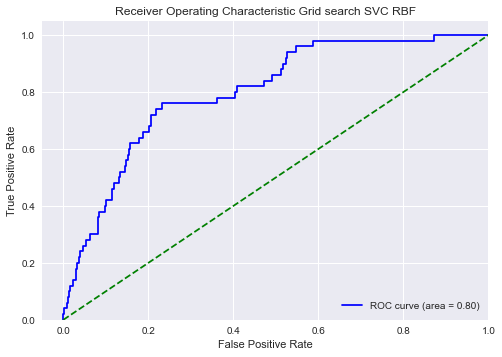

In [69]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)
show_analysis('Grid search SVC RBF',y_test,y_pred,y_prob)
append_scores('Grid search SVC RBF', y_test, y_pred)

##Bayes net

In [75]:
data = pd.read_csv('assets/healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [1]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import pandas as pd
import numpy as np
# Load dataset
data = pd.read_csv('assets/healthcare-dataset-stroke-data.csv')

# Define the structure of the Bayesian network
# 

import csv 

data = data.replace('?',np.nan)

print('Sample instances from the dataset are given below')
print(data.head())

print('\n Attributes and datatypes')
print(data.dtypes)

model = BayesianModel([('age', 'stroke'), 
                       ('hypertension', 'stroke'), 
                       ('heart_disease', 'stroke'),
                       ('avg_glucose_level', 'stroke'),
                       ('bmi', 'stroke'),
                       ('smoking_status', 'stroke'),
                       ('gender', 'stroke'),('ever_married','stroke'),('work_type','stroke'),('Residence_type','stroke'),])

model.fit(data,estimator=MaximumLikelihoodEstimator)

y_pred =model.predict(X_test)

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Sample instances from the dataset are given below
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

 Attr

##Random Forest

Classification report for RFC: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.40      0.08      0.13        50

    accuracy                           0.95      1022
   macro avg       0.68      0.54      0.55      1022
weighted avg       0.93      0.95      0.93      1022

Confusion matrix for RFC: 
[[966   6]
 [ 46   4]]
Accuracy score for RFC: 0.95
Sensitivity score for RFC: 0.08
Specitivity score for RFC: 0.99
AUC score for RFC: 0.82


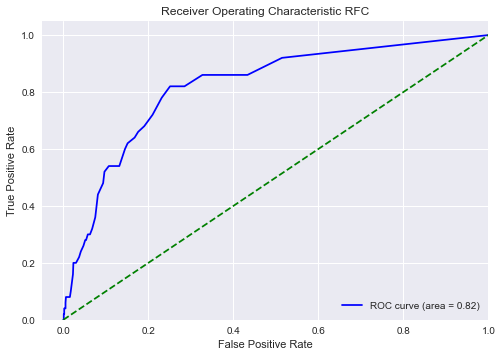

In [45]:
# Training Random Forest Classifer
model = RandomForestClassifier()
model.fit(x_sm, y_sm)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

# Evaluation of the model

append_scores('RFC',y_test,y_pred)
show_analysis('RFC',y_test,y_pred,y_prob)

##RBF

In [ ]:
model = SVC(kernel='rbf', probability=True) 
model.fit(x_sm, y_sm)
y_pred =model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

append_scores('RBF',y_test,y_pred)

Classification report for SVC RBF: 
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       972
           1       0.11      0.68      0.19        50

    accuracy                           0.72      1022
   macro avg       0.54      0.70      0.51      1022
weighted avg       0.94      0.72      0.80      1022

Confusion matrix for SVC RBF: 
[[703 269]
 [ 16  34]]
Accuracy score for SVC RBF: 0.72
Sensitivity score for SVC RBF: 0.68
Specitivity score for SVC RBF: 0.72
AUC score for SVC RBF: 0.81


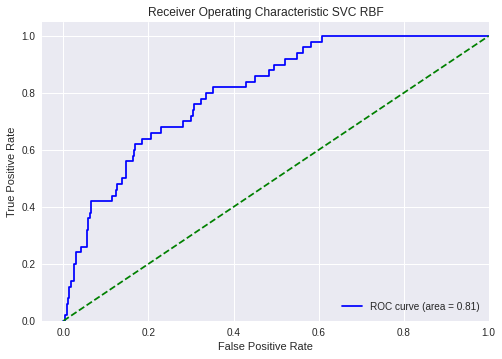

In [ ]:
show_analysis('SVC RBF',y_test,y_pred,y_prob)

In [ ]:
params = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf',]}
scorer = make_scorer(custom_loss_function1,greater_is_better=True)
clf = GridSearchCV(SVC(), params, scoring = scorer)
clf.fit(x_sm,y_sm)
# print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)

0.9712569494220528
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Classification report for Grid search SVC RBF: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       972
           1       0.07      0.08      0.07        50

    accuracy                           0.90      1022
   macro avg       0.51      0.51      0.51      1022
weighted avg       0.91      0.90      0.91      1022

Confusion matrix for Grid search SVC RBF: 
[[917  55]
 [ 46   4]]
Accuracy score for Grid search SVC RBF: 0.90
Sensitivity score for Grid search SVC RBF: 0.08
Specitivity score for Grid search SVC RBF: 0.94
AUC score for Grid search SVC RBF: 0.61


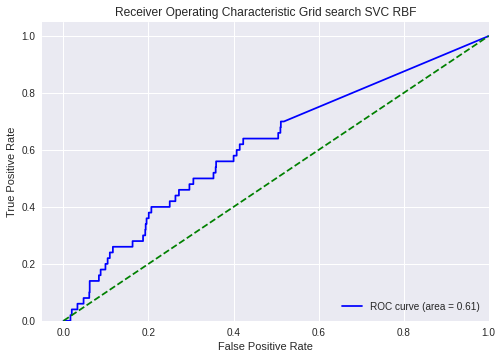

In [ ]:
clf = SVC(probability = True,C = 10,gamma = 1,kernel = 'rbf')
clf.fit(x_sm,y_sm)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

show_analysis('Grid search SVC RBF',y_test,y_pred,y_prob)
append_scores('Grid search SVC RBF', y_test, y_pred)

## knn

In [ ]:
model = kNN()
model.fit(x_sm, y_sm)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

append_scores('kNN',y_test,y_pred)

Classification report for kNN: 
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.09      0.22      0.12        50

    accuracy                           0.85      1022
   macro avg       0.52      0.55      0.52      1022
weighted avg       0.91      0.85      0.88      1022

Confusion matrix for kNN: 
[[855 117]
 [ 39  11]]
Accuracy score for kNN: 0.85
Sensitivity score for kNN: 0.22
Specitivity score for kNN: 0.88
AUC score for kNN: 0.63


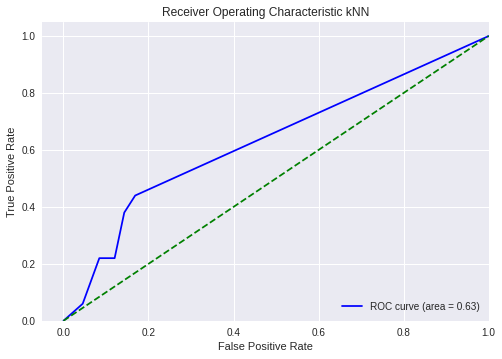

In [ ]:
show_analysis('kNN',y_test,y_pred,y_prob)

## MLP(ANN)

In [ ]:
model = MLPClassifier(solver = 'sgd')
model.fit(x_sm, y_sm)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

append_scores('MLP',y_test,y_pred)

Classification report for MLP: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.74      0.81      1022

Confusion matrix for MLP: 
[[714 258]
 [ 10  40]]
Accuracy score for MLP: 0.74
Sensitivity score for MLP: 0.80
Specitivity score for MLP: 0.73
AUC score for MLP: 0.84


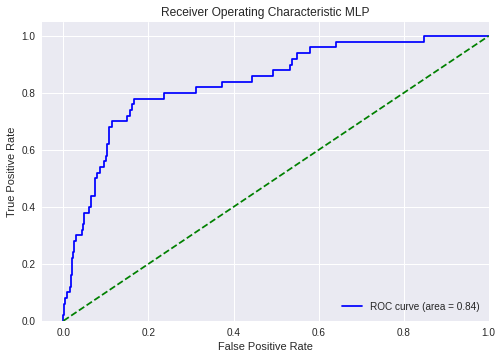

In [ ]:
show_analysis('MLP',y_test,y_pred,y_prob)

##ANN 


In [7]:
data = pd.read_csv("assets/healthcare-dataset-stroke-data.csv")
del data['id']
data = data.dropna()
label_encoder = LabelEncoder()
data.loc[:,"ever_married"] = label_encoder.fit_transform(data.loc[:,"ever_married"])
data.loc[:,"Residence_type"] = label_encoder.fit_transform(data.loc[:,"Residence_type"])
x_feature = data.drop(['stroke'], axis = 1)
y_feature = data['stroke']
onehotEn = OneHotEncoder()
columntrans = ColumnTransformer(transformers= [('encoder', onehotEn, [0,5,9])], remainder = 'passthrough')
x_transformed = columntrans.fit_transform(x_feature)
print('Shape of X: ', x_transformed.shape)
print('Shape of Y: ', y_feature.shape)

Shape of X:  (4909, 19)
Shape of Y:  (4909,)


In [10]:
#Class Balancing using SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x_transformed, y_feature)

In [11]:
print('Shape of X: ', x_smote.shape)
print('Shape of Y: ', y_smote.shape)

Shape of X:  (9400, 19)
Shape of Y:  (9400,)


In [13]:
scalar = StandardScaler()
X_train_standard = scalar.fit_transform(X_train)
X_test_standard = scalar.fit_transform(X_test)
print(X_train[2])
print("next")
print(X_train_standard[2])

[  1.     0.     0.     0.     0.     1.     0.     0.     0.     1.
   0.     0.    55.     0.     0.     1.     0.   111.19  39.7 ]
next
[ 0.92859157 -0.92859157  0.         -0.43266861 -0.04898326  0.89110929
 -0.54030592 -0.28305543 -0.58090727  2.10388263 -0.8554474  -0.48941009
  0.01447627 -0.52177806 -0.41884473  0.5746503  -1.11235273 -0.15765494
  1.49332767]


In [14]:
model_SS = Sequential()#lets use this
model_SS.add(Dense(64, input_dim = X_train_standard.shape[1], activation = "relu"))
model_SS.add(Dense(16, activation = 'relu'))
model_SS.add(Dense(1, activation = 'sigmoid'))
model_SS.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [15]:
model_SS.fit(X_train_standard, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
752/752 [==============================] - 4s 3ms/step - loss: 0.4394 - accuracy: 0.7987
Epoch 2/50
752/752 [==============================] - 2s 3ms/step - loss: 0.3496 - accuracy: 0.8527
Epoch 3/50
752/752 [==============================] - 4s 5ms/step - loss: 0.2907 - accuracy: 0.8783
Epoch 4/50
752/752 [==============================] - 4s 5ms/step - loss: 0.2403 - accuracy: 0.9020
Epoch 5/50
752/752 [==============================] - 5s 6ms/step - loss: 0.2054 - accuracy: 0.9160
Epoch 6/50
752/752 [==============================] - 5s 6ms/step - loss: 0.1799 - accuracy: 0.9278
Epoch 7/50
752/752 [==============================] - 4s 5ms/step - loss: 0.1626 - accuracy: 0.9346
Epoch 8/50
752/752 [==============================] - 4s 5ms/step - loss: 0.1490 - accuracy: 0.9403
Epoch 9/50
752/752 [==============================] - 4s 6ms/step - loss: 0.1375 - accuracy: 0.9435
Epoch 10/50
752/752 [==============================] - 3s 4ms/step - loss: 0.1278 - accuracy: 0.9477

In [16]:
y_pred_SS = model_SS.predict(X_test_standard)
y_pred_SS = (y_pred_SS > 0.5)

59/59 [==============================] - 0s 2ms/step


In [ ]:
# from tensorflow.keras.utils import plot_model

# # Assuming 'model' is already defined
# plot_model(model_SS, to_file='model_architecture.png', show_shapes=True)



In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_SS))
print('R square:', r2_score(y_test, y_pred_SS))
print('Accuracy:', accuracy_score(y_test, y_pred_SS))

report = classification_report(y_test, y_pred_SS, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred_SS)
print(cm)
# print(cm)

Mean Squared Error: 0.040957446808510635
R square: 0.8361101173359176
Accuracy: 0.9590425531914893
              precision    recall  f1-score   support

           0     0.9628    0.9534    0.9580       922
           1     0.9555    0.9645    0.9600       958

    accuracy                         0.9590      1880
   macro avg     0.9591    0.9589    0.9590      1880
weighted avg     0.9591    0.9590    0.9590      1880

[[879  43]
 [ 34 924]]


59/59 [==============================] - 0s 2ms/step


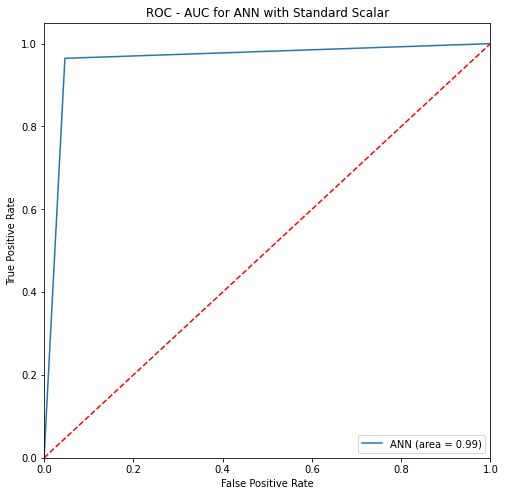

In [25]:
ANN_roc_auc = roc_auc_score(y_test, model_SS.predict(X_test_standard))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_SS, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN with Standard Scalar')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

In [ ]:
# print('Shape of X_train: ', X_train.shape)
# print('Shape of y_train: ', y_train.shape)
# print('Shape of X_test: ', X_test.shape)
# print('Shape of Y_test: ', y_test.shape)
# #MinMaxScalar
# MMscalar = MinMaxScaler()
# X_train_MinMax = MMscalar.fit_transform(X_train)
# X_test_MinMax = MMscalar.fit_transform(X_test)

# LR

In [ ]:
model = LogisticRegression() 
model.fit(x_sm, y_sm)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)
classifiers.append(model)

append_scores('LR',y_test,y_pred)

Classification report for LR: 
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

Confusion matrix for LR: 
[[726 246]
 [ 10  40]]
Accuracy score for LR: 0.75
Sensitivity score for LR: 0.80
Specitivity score for LR: 0.75
AUC score for LR: 0.84


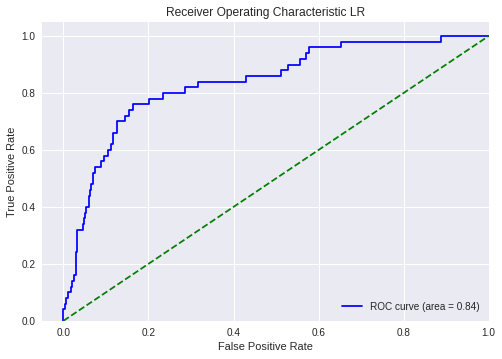

In [ ]:
show_analysis('LR',y_test,y_pred,y_prob)

In [ ]:

params = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'C' : [1e-5, 1e-3, 1e-1, 1]
}

scorer = make_scorer(custom_loss_function1,greater_is_better=True)
clf = GridSearchCV(LogisticRegression(), params, scoring = scorer)
clf.fit(x_sm,y_sm)
# print(clf.cv_results_)
print(clf.best_score_)
print(clf.best_params_)


0.7708140929020271
{'C': 0.001, 'penalty': 'l2', 'solver': 'newton-cg'}


Classification report for Grid search LR: 
              precision    recall  f1-score   support

           0       0.99      0.73      0.84       972
           1       0.13      0.80      0.22        50

    accuracy                           0.73      1022
   macro avg       0.56      0.76      0.53      1022
weighted avg       0.94      0.73      0.81      1022

Confusion matrix for Grid search LR: 
[[706 266]
 [ 10  40]]
Accuracy score for Grid search LR: 0.73
Sensitivity score for Grid search LR: 0.80
Specitivity score for Grid search LR: 0.73
AUC score for Grid search LR: 0.84


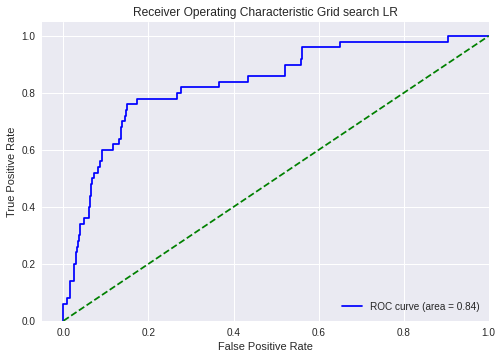

In [ ]:
clf = LogisticRegression(C = 0.001, penalty = 'l2', solver = 'newton-cg')
clf.fit(x_sm,y_sm)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)

show_analysis('Grid search LR',y_test,y_pred,y_prob)
append_scores('Grid search LR', y_test, y_pred)

##Comparison

In [ ]:
df = pd.DataFrame({'models': models, 'accuracy': models_accuracy, 'sensitivity': models_sensitivity, 'specificity': models_specificity})
df

In [ ]:
def Bagging(input, models):
    cumulative_pred = np.zeros((len(input)), dtype = int)

    for i in range(len(models)):
        cumulative_pred += np.array(models[i].predict(input))

    cumulative_pred = cumulative_pred > len(models)//2
    cumulative_pred = cumulative_pred*1

    return cumulative_pred.tolist();

pred = Bagging(X_test, classifiers)

In [ ]:
print("Classification report for Bagging: \n{}".format(classification_report(y_test,pred)))
print("Confusion matrix for Bagging: \n{}".format(confusion_matrix(y_test,pred)))
print("Accuracy score for Bagging: {:.2f}".format(accuracy_score(y_test,pred)))

Classification report for Bagging: 
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       972
           1       0.15      0.74      0.24        50

    accuracy                           0.77      1022
   macro avg       0.56      0.76      0.56      1022
weighted avg       0.94      0.77      0.84      1022

Confusion matrix for Bagging: 
[[755 217]
 [ 13  37]]
Accuracy score for Bagging: 0.77


#Machine Learning Model Deployment Code

In [ ]:
! pip install streamlit

     |████████████████████████████████| 10.1 MB 5.4 MB/s 
     |████████████████████████████████| 181 kB 38.9 MB/s 
     |████████████████████████████████| 76 kB 4.2 MB/s 
     |████████████████████████████████| 164 kB 40.0 MB/s 
     |████████████████████████████████| 4.3 MB 26.1 MB/s 
     |████████████████████████████████| 111 kB 38.6 MB/s 
     |████████████████████████████████| 63 kB 978 kB/s 
     |████████████████████████████████| 131 kB 37.4 MB/s 
     |████████████████████████████████| 130 kB 35.2 MB/s 
     |████████████████████████████████| 793 kB 40.3 MB/s 
     |████████████████████████████████| 428 kB 30.3 MB/s 
     |████████████████████████████████| 381 kB 42.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=46d045cbdd20e7028cc9d98d90feb9913a13fca5b452fc817589ed6d41eee7e1
  Stored in directory: /root/.cache/pip/wheels/22/f5/18/df711b66eb25b21325c132757d4314db9ac5e8dabeaf196eab
Successfully built blinker
  Attempting uninstall: 

In [ ]:
import pickle

In [ ]:
model = classifiers[-2]

In [ ]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
input_data = (1,0.874525,0,0,1,2,0,-0.616568,0.765941,2)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict_proba(input_data_reshaped)[:,1][0]
print(f"You have {prediction*100}% chance of having a stroke.")

You have 51.36114046468848% chance of having a stroke.
